Accuracy for each fold: [0.3  0.4  0.3  0.65 0.25]
Mean Accuracy: 0.38
Standard Deviation: 0.144


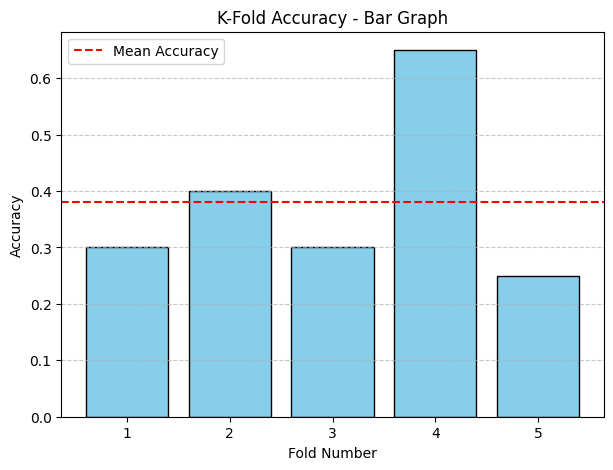

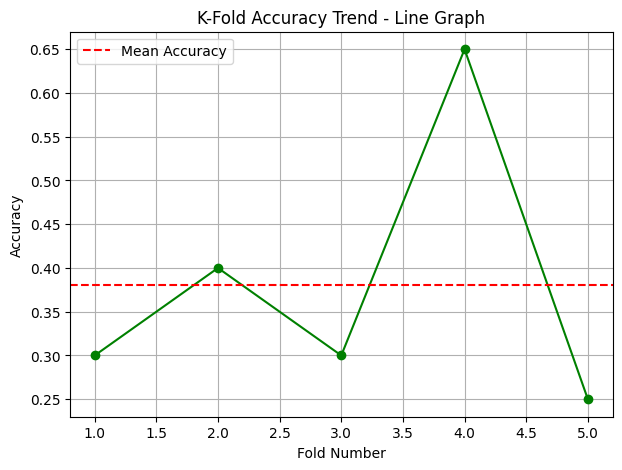

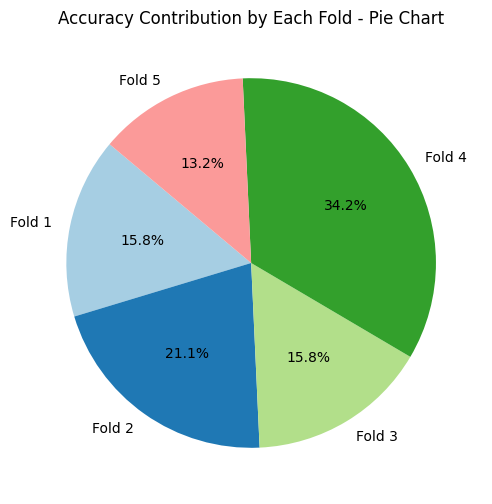

In [10]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = pd.read_csv("pet_adoption_dataset.csv")

# Step 2: Encode categorical columns
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    if col != 'Pet_ID':
        data[col] = le.fit_transform(data[col])

# Step 3: Split features and target
X = data.drop(['Pet_ID', 'AdoptionSpeed'], axis=1)
y = data['AdoptionSpeed']

# Step 4: Apply Random Forest model
model = RandomForestClassifier(random_state=42)

# Step 5: Perform 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Step 6: Print accuracy results
print("Accuracy for each fold:", scores)
print("Mean Accuracy:", round(np.mean(scores), 3))
print("Standard Deviation:", round(np.std(scores), 3))

# ---------- GRAPH 1: BAR GRAPH ----------
plt.figure(figsize=(7,5))
plt.bar(range(1, len(scores)+1), scores, color='skyblue', edgecolor='black')
plt.axhline(np.mean(scores), color='red', linestyle='--', label='Mean Accuracy')
plt.title("K-Fold Accuracy - Bar Graph")
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ---------- GRAPH 2: LINE GRAPH ----------
plt.figure(figsize=(7,5))
plt.plot(range(1, len(scores)+1), scores, marker='o', linestyle='-', color='green')
plt.axhline(np.mean(scores), color='red', linestyle='--', label='Mean Accuracy')
plt.title("K-Fold Accuracy Trend - Line Graph")
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ---------- GRAPH 3: PIE CHART ----------
labels = [f'Fold {i}' for i in range(1, len(scores)+1)]
plt.figure(figsize=(6,6))
plt.pie(scores, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Accuracy Contribution by Each Fold - Pie Chart")
plt.show()
